### 2007 and 2013 West Coast Ocean Acidification cruises

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
import statsmodels.formula.api as smf
import pingouin as pg

import PyCO2SYS as pyco2

Load 2007 data

In [22]:
filename07 = 'data/wcoa_cruise_2007/32WC20070511.exc.csv'
df07 = pd.read_csv(filename07,header=29,na_values=-999,parse_dates=[[6,7]])

In [23]:
df07.keys()

Index(['DATE_TIME', 'EXPOCODE', 'SECT_ID', 'SAMPNO', 'LINE', 'STNNBR',
       'CASTNO', 'LATITUDE', 'LONGITUDE', 'BOT_DEPTH', 'BTLNBR',
       'BTLNBR_FLAG_W', 'CTDPRS', 'CTDTMP', 'CTDSAL', 'CTDSAL_FLAG_W',
       'SALNTY', 'SALNTY_FLAG_W', 'CTDOXY', 'CTDOXY_FLAG_W', 'OXYGEN',
       'OXYGEN_FLAG_W', 'SILCAT', 'SILCAT_FLAG_W', 'NITRAT', 'NITRAT_FLAG_W',
       'NITRIT', 'NITRIT_FLAG_W', 'PHSPHT', 'PHSPHT_FLAG_W', 'TCARBN',
       'TCARBN_FLAG_W', 'ALKALI', 'ALKALI_FLAG_W'],
      dtype='object')

Load 2013 data

In [24]:
filename13 = 'data/wcoa_cruise/WCOA2013_hy1.csv'
df13 =  pd.read_csv(filename13,header=31,na_values=-999,parse_dates=[[8,9]])

Use the PyCO2SYS package to calculate seawater carbon chemistry parameters.

https://pyco2sys.readthedocs.io/en/latest/

In [26]:
c07 = pyco2.sys(df07['ALKALI'], df07['TCARBN'], 1, 2,
               salinity=df07['CTDSAL'], temperature=df07['CTDTMP'], 
                pressure=df07['CTDPRS'])

In [27]:
c13 = pyco2.sys(df13['ALKALI'], df13['TCARBN'], 1, 2,
               salinity=df13['CTDSAL'], temperature=df13['CTDTMP'], 
                pressure=df13['CTDPRS'])

Text(0.5, 1.0, 'Aragonite saturation state')

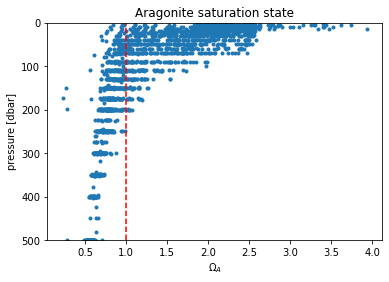

In [28]:
plt.figure()
plt.plot(c07['saturation_aragonite'],df07['CTDPRS'],'.')
plt.gca().invert_yaxis()
yl = plt.ylim([500,0])
plt.plot([1,1],yl,'r--')
plt.ylabel('pressure [dbar]')
plt.xlabel('$\Omega_A$')
plt.title('Aragonite saturation state')

### Linear regression: four methods in Python

Create $x$ and $y$ variables.

In [29]:
x = df07['PHSPHT']
y = df07['NITRAT']

Plot data.

Text(0, 0.5, 'Nitrate [$\\mu$mol/kg]')

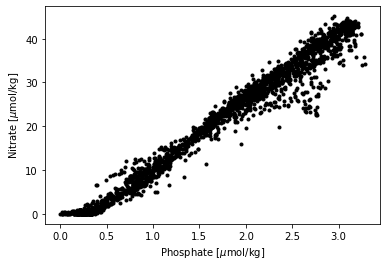

In [30]:
plt.figure()
plt.plot(x,y,'k.')
plt.xlabel('Phosphate [$\mu$mol/kg]')
plt.ylabel('Nitrate [$\mu$mol/kg]')

Create a subset where both variables have finite values.

In [31]:
ii = np.isfinite(x+y) # subset of x and y

#### Method 1: Numpy

Coefficients (slope and intercept)

In [32]:
p = np.polyfit(x[ii],y[ii],1)
p

array([14.74003452, -3.93257206])

Calculate model values

In [33]:
yhat = p[0]*x + p[1]

Draw regression line

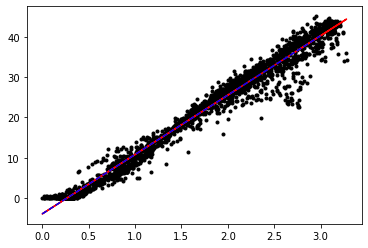

In [34]:
plt.figure()
plt.plot(x[ii],y[ii],'k.')
plt.plot(x[ii],yhat[ii],'r-')
plt.plot(np.array([0,3]),
         p[0]*np.array([0,3]) +
         p[1],'b--')

#### Exercise

Make exploratory plots comparing data from the two cruises. Do you notice any difference in the patterns of water properties?

#### Method 2: Scipy

In [35]:
result = stats.linregress(x[ii],y[ii])

In [36]:
result

LinregressResult(slope=14.740034517902107, intercept=-3.9325720551997954, rvalue=0.9860645445968036, pvalue=0.0, stderr=0.05292378356970245, intercept_stderr=0.10258209230911518)

In [37]:
result.slope

14.740034517902107

#### Method 3: statsmodels

Ordinary least squares fit using [statsmodels](https://www.statsmodels.org/).

In [38]:
smres = smf.ols('NITRAT ~ PHSPHT',df07).fit() # ordinary least squares

In [39]:
smres.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 NITRAT   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                 7.757e+04
Date:                Sun, 07 Mar 2021   Prob (F-statistic):               0.00
Time:                        19:07:43   Log-Likelihood:                -4993.9
No. Observations:                2210   AIC:                             9992.
Df Residuals:                    2208   BIC:                         1.000e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.9326      0.103    -38.336      0.000      -4.134      -3.731
PHSPHT        14.7400      0.053    278.514      0.000      14.636      14.844
==============================================================================
Omnibus:                      874.728   Durbin-Watson:                   0.269
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5147.310
Skew:                          -1.766   Prob(JB):                         0.00
Kurtosis:                       9.589   Cond. No.                         4.90
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
smres.params.PHSPHT

14.740034517902119

#### Method 4: pingouin

In [41]:
pg.linear_regression(x[ii],y[ii])

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,-3.932572,0.102582,-38.335853,6.540950e-247,0.972323,0.972311,-4.133740,-3.731405
1,PHSPHT,14.740035,0.052924,278.514375,0.000000e+00,0.972323,0.972311,14.636249,14.843820
